In [ ]:
from prophet import Prophet
from matplotlib import pyplot as plt
import json5

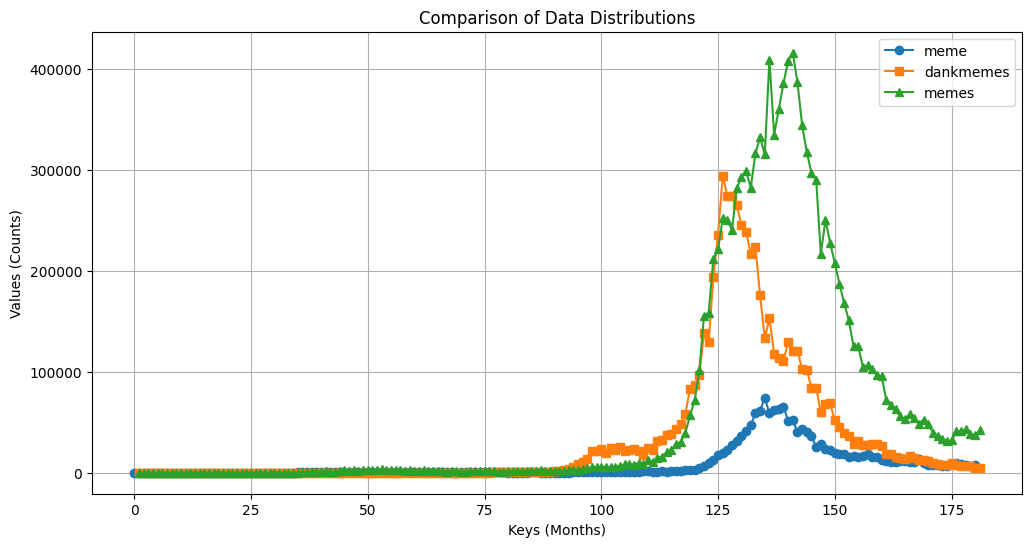

In [4]:
# The graph of the data distribution of the three datasets

with open("time_unit_meme.json", 'r') as json_file:
    data1 = json5.load(json_file)  
with open("time_unit_dankmemes.json", 'r') as json_file:
    data2 = json5.load(json_file)  
with open("time_unit_memes.json", 'r') as json_file:
    data3 = json5.load(json_file)  

# Convert keys to integers and sort the data by keys for each dataset
keys1 = list(map(int, data1.keys()))
values1 = list(data1.values())

keys2 = list(map(int, data2.keys()))
values2 = list(data2.values())

keys3 = list(map(int, data3.keys()))
values3 = list(data3.values())

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(keys1, values1, label='meme', marker='o')  # Add markers for better visibility
plt.plot(keys2, values2, label='dankmemes', marker='s')
plt.plot(keys3, values3, label='memes', marker='^')

plt.title('Comparison of Data Distributions')
plt.xlabel('Keys (Months)')
plt.ylabel('Values (Counts)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import json
import pandas as pd
from datetime import datetime, timedelta

In [66]:
file_path = "time_unit_meme.json"
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

all_posts_df = pd.DataFrame(data.items(), columns=['nth month', 'Value'])

start_date = datetime(2008, 12, 1)

# Calculate the dates
all_posts_df['Date'] = all_posts_df['nth month'].apply(lambda x: start_date + pd.DateOffset(months=int(x)))
all_posts_df['Date'] = pd.to_datetime(all_posts_df['Date']) + pd.offsets.MonthEnd(0)

In [67]:
all_posts_df["created_date"] = pd.to_datetime(all_posts_df["Date"])
all_posts_df.set_index('created_date', inplace=True)

all_posts_df.head()

,nth month,Value,Date
created_date,,,
2008-12-31,0,3,2008-12-31
2009-01-31,1,1,2009-01-31
2009-02-28,2,0,2009-02-28
2009-03-31,3,0,2009-03-31
2009-04-30,4,0,2009-04-30


In [5]:
file_path = "meme_table.csv"
meme_df = pd.read_csv(file_path)
meme_df.head()

/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,meme_id,cluster,created_utc,title,selftext,author,num_comments,score,extracted_text,comments_text,created_date
0,cawlo8,cluster_4,1.562651e+09,"I have an MIDI keyboard, just no plug for it ):",NaN,YTMusicXD,0,3,When you want to easily make midi; limited pow...,NaN,2019-07-09
1,d72m1n,cluster_4,1.569021e+09,R.I.P,NaN,masnargom,0,95,When Imina room full of antivax children and f...,NaN,2019-09-20
2,bo6k2s,cluster_4,1.557769e+09,It's like a life hack,NaN,emanuelegay,2,4,Connect one Power Bank to another one Unlimite...,This is just plug in a power strip to itself\n...,2019-05-13
3,cr40bc,cluster_4,1.565948e+09,I Finally Have Unlimited Power,NaN,Zaxoosh,0,64,When you finally get enough karma to post on r...,NaN,2019-08-16
4,apoel0,cluster_4,1.549939e+09,Crrevt,NaN,memeboiiii7059,0,7,whwn yoy make a meme wirh one hand Unlimited p...,NaN,2019-02-12


In [63]:
# cluster_4
cluster_to_analyze = "cluster_4"  # Replace with the cluster you want to analyze
cluster_df = meme_df[meme_df["cluster"] == cluster_to_analyze]

cluster_df['created_date'] = pd.to_datetime(cluster_df['created_date'])
cluster_df.set_index('created_date', inplace=True)
monthly_frequency = cluster_df.resample('M').size()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/1555084681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_date'])
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/1555084681.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = cluster_df.resample('M').size()


In [68]:
aligned_template = monthly_frequency.reindex(all_posts_df.index)
aligned_2 = all_posts_df.reindex(monthly_frequency.index)
aligned_2.head()

,nth month,Value,Date
created_date,,,
2018-12-31,120,3063,2018-12-31
2019-01-31,121,4660,2019-01-31
2019-02-28,122,6465,2019-02-28
2019-03-31,123,9917,2019-03-31
2019-04-30,124,12731,2019-04-30


In [69]:
result = monthly_frequency / aligned_2['Value']
result.head()

created_date
2018-12-31    0.000326
2019-01-31    0.000215
2019-02-28    0.000464
2019-03-31    0.000303
2019-04-30    0.000000
Freq: ME, dtype: float64

In [76]:
relative_popularity_df = result.reset_index()
relative_popularity_df.rename(columns={"created_date": "ds", 0: "y"}, inplace=True)
relative_popularity_df.head()

,ds,y
0,2018-12-31,0.000326
1,2019-01-31,0.000215
2,2019-02-28,0.000464
3,2019-03-31,0.000303
4,2019-04-30,0.000000


20:32:05 - cmdstanpy - INFO - Chain [1] start processing


20:32:05 - cmdstanpy - INFO - Chain [1] done processing
/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


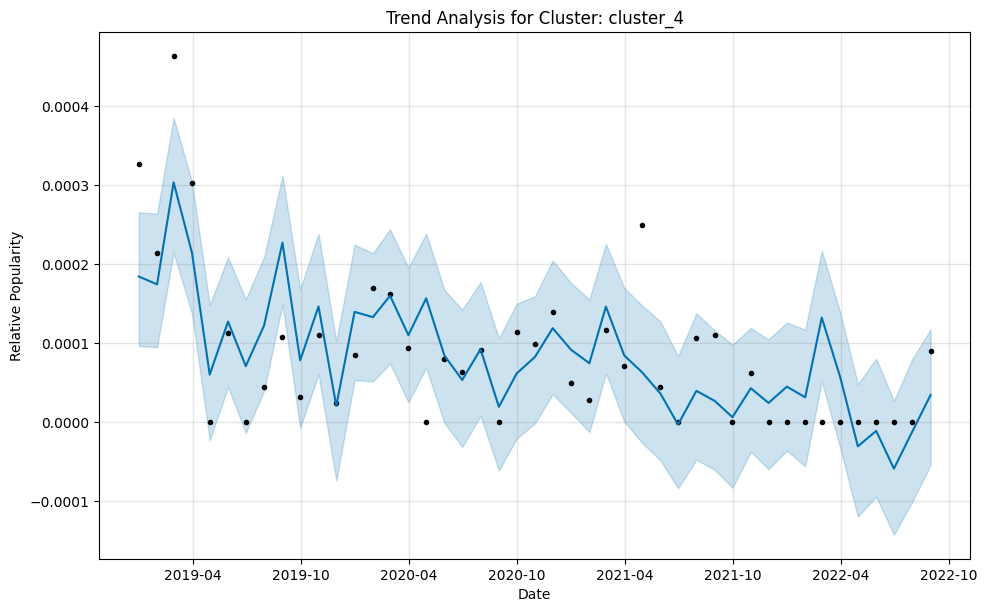

Slope of trend: -3.8090543131651484e-06
This template is losing relative popularity.


/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/2422812015.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months


In [77]:
# Step 7: Fit the Prophet model
model = Prophet()
model.fit(relative_popularity_df)

# Step 8: Make future predictions (for historical analysis, no future periods needed)
future = model.make_future_dataframe(periods=0, freq='M')  # Monthly frequency
forecast = model.predict(future)

# Step 9: Visualize the trend
fig = model.plot(forecast)
plt.title(f"Trend Analysis for Cluster: {cluster_to_analyze}")
plt.xlabel("Date")
plt.ylabel("Relative Popularity")
plt.show()

# Step 10: Analyze the trend
# Extract trend data to calculate the slope
trend_data = forecast[['ds', 'trend']]
trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months
slope = (trend_data['trend'].iloc[-1] - trend_data['trend'].iloc[0]) / trend_data['month_number'].iloc[-1]

print(f"Slope of trend: {slope}")
if slope > 0:
    print("This template is gaining relative popularity.")
elif slope < 0:
    print("This template is losing relative popularity.")
else:
    print("This template has a neutral relative popularity trend.")

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/1173612840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/1173612840.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = cluster_df.resample('M').size()
20:33:33 - cmdstanpy - INFO - Chain [1] start processing
20:33:34 - cmdstanpy - INFO - Chain [1] done processing
/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.da

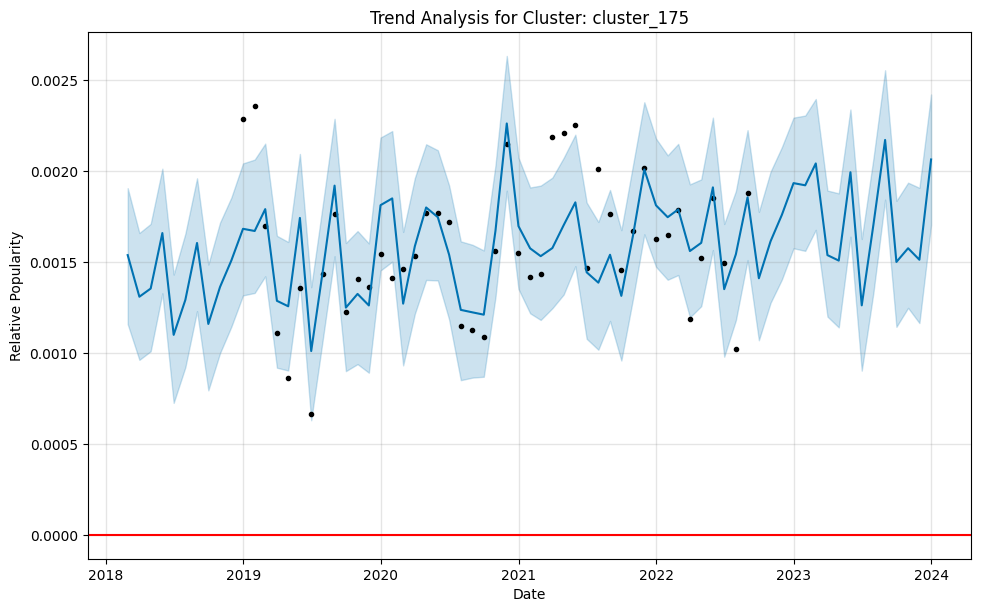

Slope of trend: 5.161150615125883e-06
This template is gaining relative popularity.


/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/1173612840.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months


In [78]:
# cluster_175
cluster_to_analyze = "cluster_175"  # Replace with the cluster you want to analyze
cluster_df = meme_df[meme_df["cluster"] == cluster_to_analyze]

cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
monthly_frequency = cluster_df.resample('M').size()
result = monthly_frequency / aligned_2['Value']
relative_popularity_df = result.reset_index()
relative_popularity_df.rename(columns={"created_date": "ds", 0: "y"}, inplace=True)

# Step 7: Fit the Prophet model
model = Prophet()
model.fit(relative_popularity_df)

# Step 8: Make future predictions (for historical analysis, no future periods needed)
future = model.make_future_dataframe(periods=0, freq='M')  # Monthly frequency
forecast = model.predict(future)

# Step 9: Visualize the trend
fig = model.plot(forecast)
plt.axhline(y=0, color='red')
plt.title(f"Trend Analysis for Cluster: {cluster_to_analyze}")
plt.xlabel("Date")
plt.ylabel("Relative Popularity")
plt.show()

# Step 10: Analyze the trend
# Extract trend data to calculate the slope
trend_data = forecast[['ds', 'trend']]
trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months
slope = (trend_data['trend'].iloc[-1] - trend_data['trend'].iloc[0]) / trend_data['month_number'].iloc[-1]

print(f"Slope of trend: {slope}")
if slope > 0:
    print("This template is gaining relative popularity.")
elif slope < 0:
    print("This template is losing relative popularity.")
else:
    print("This template has a neutral relative popularity trend.")


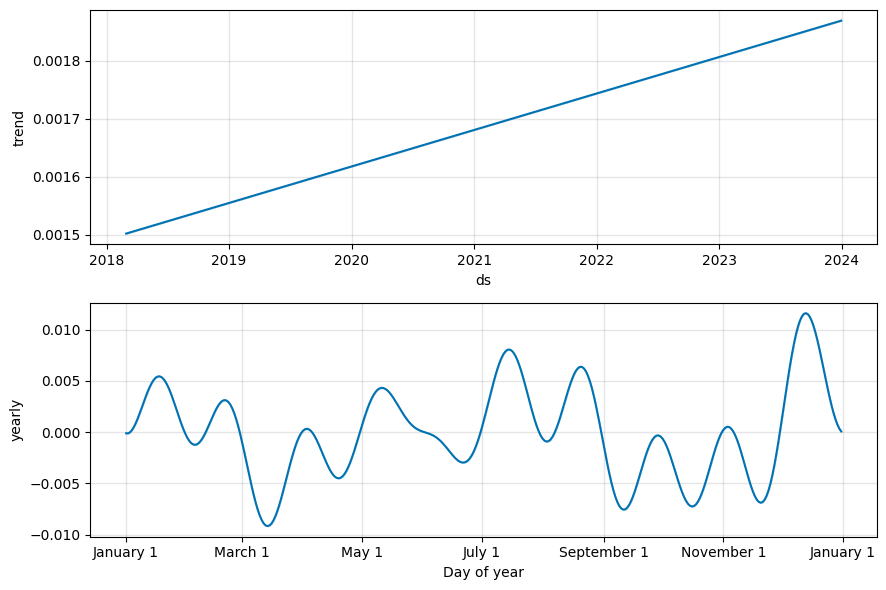

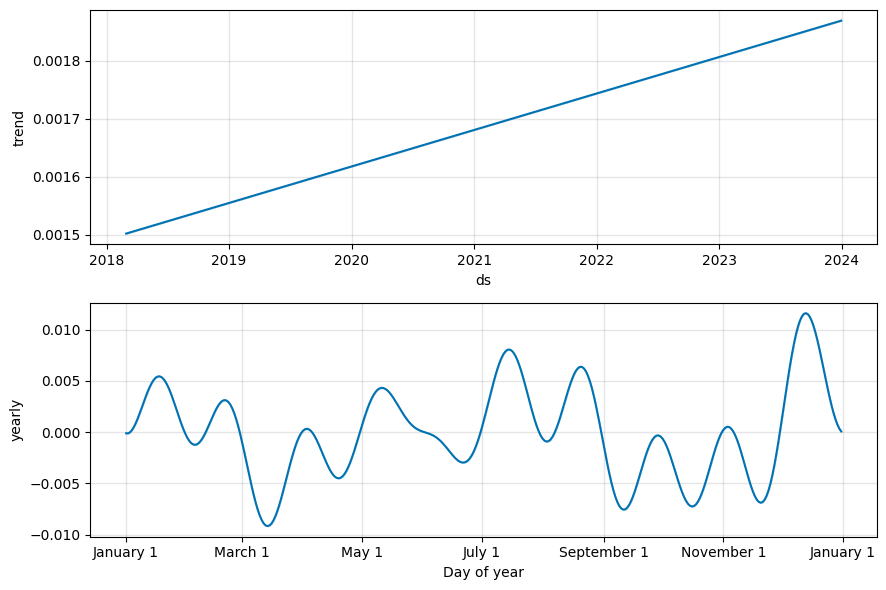

In [79]:
model.plot_components(forecast)

20:34:18 - cmdstanpy - INFO - Chain [1] start processing


20:34:18 - cmdstanpy - INFO - Chain [1] done processing
/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


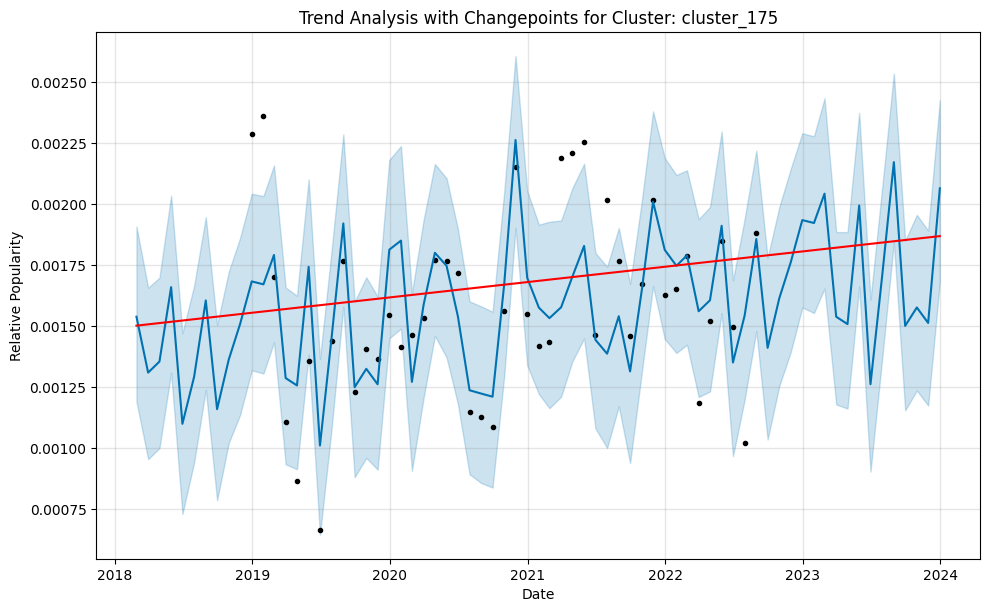

In [80]:
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt

# Assuming you already have the `relative_popularity_df` prepared
model = Prophet()
model.fit(relative_popularity_df)

# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=0, freq='M')  # Historical only
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

# Add changepoints to the plot
add_changepoints_to_plot(fig.gca(), model, forecast)

# Customize the plot
plt.title(f"Trend Analysis with Changepoints for Cluster: {cluster_to_analyze}")
plt.xlabel("Date")
plt.ylabel("Relative Popularity")
plt.show()

/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/3459586954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/3459586954.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = cluster_df.resample('M').size()
20:35:04 - cmdstanpy - INFO - Chain [1] start processing
20:35:04 - cmdstanpy - INFO - Chain [1] done processing
/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.da

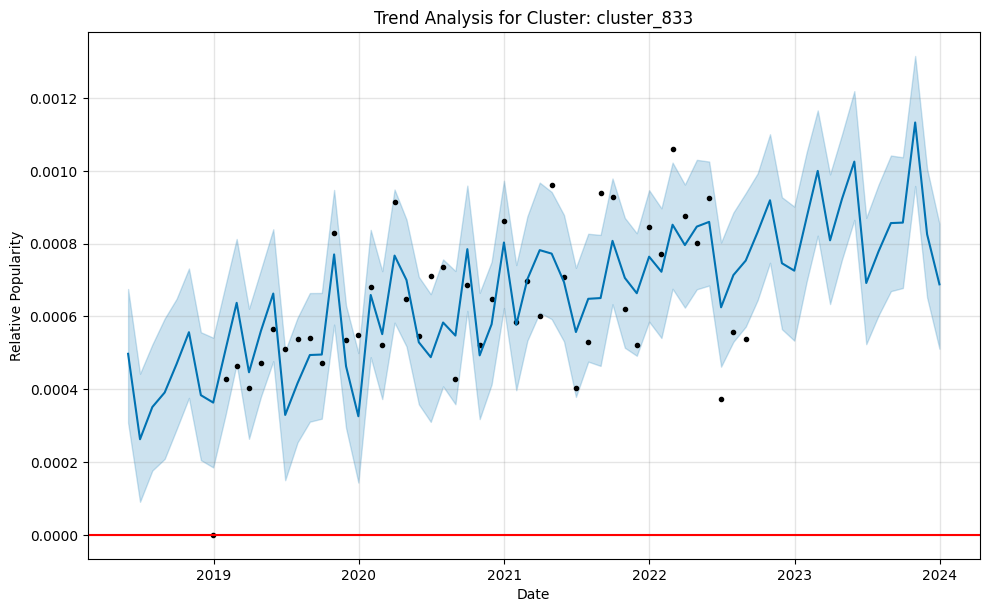

Slope of trend: 7.440868478057102e-06
This template is gaining relative popularity.


/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/3459586954.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months


In [81]:
# cluster_833
cluster_to_analyze = "cluster_833"  # Replace with the cluster you want to analyze
cluster_df = meme_df[meme_df["cluster"] == cluster_to_analyze]

cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
monthly_frequency = cluster_df.resample('M').size()
result = monthly_frequency / aligned_2['Value']
relative_popularity_df = result.reset_index()
relative_popularity_df.rename(columns={"created_date": "ds", 0: "y"}, inplace=True)

# Step 7: Fit the Prophet model
model = Prophet()
model.fit(relative_popularity_df)

# Step 8: Make future predictions (for historical analysis, no future periods needed)
future = model.make_future_dataframe(periods=0, freq='M')  # Monthly frequency
forecast = model.predict(future)

# Step 9: Visualize the trend
fig = model.plot(forecast)
plt.axhline(y=0, color='red')
plt.title(f"Trend Analysis for Cluster: {cluster_to_analyze}")
plt.xlabel("Date")
plt.ylabel("Relative Popularity")
plt.show()

# Step 10: Analyze the trend
# Extract trend data to calculate the slope
trend_data = forecast[['ds', 'trend']]
trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months
slope = (trend_data['trend'].iloc[-1] - trend_data['trend'].iloc[0]) / trend_data['month_number'].iloc[-1]

print(f"Slope of trend: {slope}")
if slope > 0:
    print("This template is gaining relative popularity.")
elif slope < 0:
    print("This template is losing relative popularity.")
else:
    print("This template has a neutral relative popularity trend.")


/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/976828851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/976828851.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = cluster_df.resample('M').size()
20:36:04 - cmdstanpy - INFO - Chain [1] start processing
20:36:04 - cmdstanpy - INFO - Chain [1] done processing
/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date

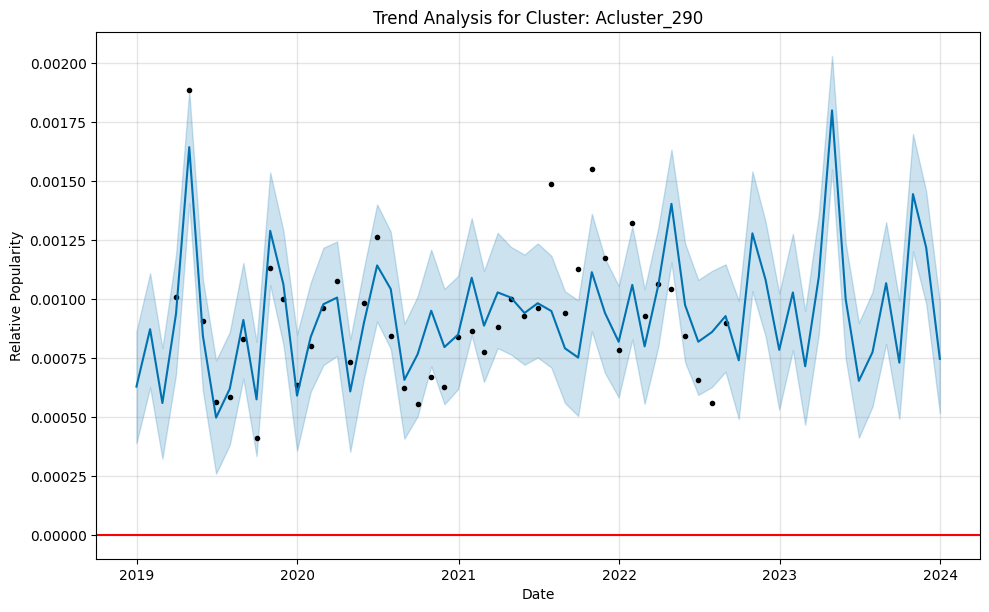

Slope of trend: 3.197215003714737e-06
This template is gaining relative popularity.


/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/976828851.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months


In [82]:
# Acluster_290
cluster_to_analyze = "Acluster_290" 
cluster_df = meme_df[meme_df["cluster"] == cluster_to_analyze]

cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
monthly_frequency = cluster_df.resample('M').size()
result = monthly_frequency / aligned_2['Value']
relative_popularity_df = result.reset_index()
relative_popularity_df.rename(columns={"created_date": "ds", 0: "y"}, inplace=True)

# Step 7: Fit the Prophet model
model = Prophet()
model.fit(relative_popularity_df)

# Step 8: Make future predictions (for historical analysis, no future periods needed)
future = model.make_future_dataframe(periods=0, freq='M')  # Monthly frequency
forecast = model.predict(future)

# Step 9: Visualize the trend
fig = model.plot(forecast)
plt.axhline(y=0, color='red')
plt.title(f"Trend Analysis for Cluster: {cluster_to_analyze}")
plt.xlabel("Date")
plt.ylabel("Relative Popularity")
plt.show()

# Step 10: Analyze the trend
# Extract trend data to calculate the slope
trend_data = forecast[['ds', 'trend']]
trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months
slope = (trend_data['trend'].iloc[-1] - trend_data['trend'].iloc[0]) / trend_data['month_number'].iloc[-1]

print(f"Slope of trend: {slope}")
if slope > 0:
    print("This template is gaining relative popularity.")
elif slope < 0:
    print("This template is losing relative popularity.")
else:
    print("This template has a neutral relative popularity trend.")


/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/913804922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/913804922.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = cluster_df.resample('M').size()
20:36:44 - cmdstanpy - INFO - Chain [1] start processing
20:36:44 - cmdstanpy - INFO - Chain [1] done processing
/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date

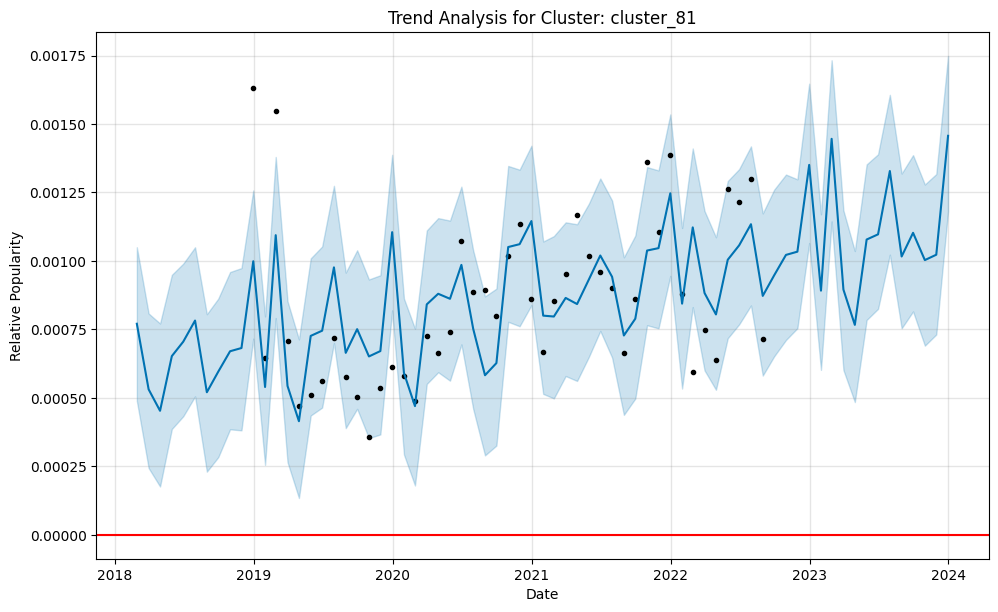

Slope of trend: 7.225147578297582e-06
This template is gaining relative popularity.


/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/913804922.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months


In [83]:
# cluster_81
cluster_to_analyze = "cluster_81" 
cluster_df = meme_df[meme_df["cluster"] == cluster_to_analyze]

cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
monthly_frequency = cluster_df.resample('M').size()
result = monthly_frequency / aligned_2['Value']
relative_popularity_df = result.reset_index()
relative_popularity_df.rename(columns={"created_date": "ds", 0: "y"}, inplace=True)

# Step 7: Fit the Prophet model
model = Prophet()
model.fit(relative_popularity_df)

# Step 8: Make future predictions (for historical analysis, no future periods needed)
future = model.make_future_dataframe(periods=0, freq='M')  # Monthly frequency
forecast = model.predict(future)

# Step 9: Visualize the trend
fig = model.plot(forecast)
plt.axhline(y=0, color='red')
plt.title(f"Trend Analysis for Cluster: {cluster_to_analyze}")
plt.xlabel("Date")
plt.ylabel("Relative Popularity")
plt.show()

# Step 10: Analyze the trend
# Extract trend data to calculate the slope
trend_data = forecast[['ds', 'trend']]
trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months
slope = (trend_data['trend'].iloc[-1] - trend_data['trend'].iloc[0]) / trend_data['month_number'].iloc[-1]

print(f"Slope of trend: {slope}")
if slope > 0:
    print("This template is gaining relative popularity.")
elif slope < 0:
    print("This template is losing relative popularity.")
else:
    print("This template has a neutral relative popularity trend.")


/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/1309242250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/1309242250.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_frequency = cluster_df.resample('M').size()
20:37:10 - cmdstanpy - INFO - Chain [1] start processing
20:37:11 - cmdstanpy - INFO - Chain [1] done processing
/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.da

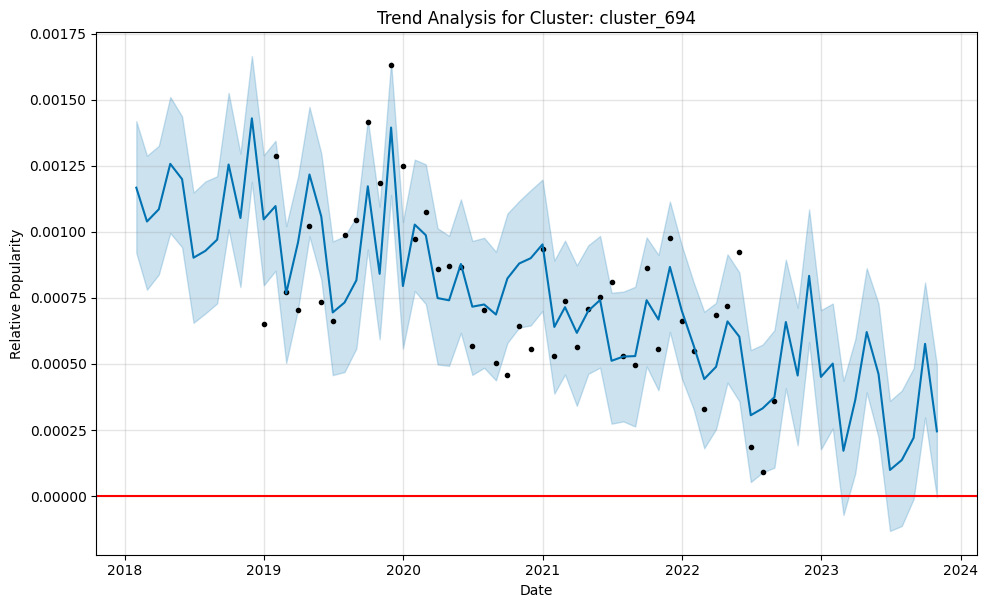

Slope of trend: -1.2242164826380655e-05
This template is losing relative popularity.


/var/folders/rg/p_ps2y216432jwhfjvk8nh8m0000gn/T/ipykernel_99042/1309242250.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months


In [84]:
# cluster_694
cluster_to_analyze = "cluster_694" 
cluster_df = meme_df[meme_df["cluster"] == cluster_to_analyze]

cluster_df['created_date'] = pd.to_datetime(cluster_df['created_utc'],unit="s")
cluster_df.set_index('created_date', inplace=True)
monthly_frequency = cluster_df.resample('M').size()
result = monthly_frequency / aligned_2['Value']
relative_popularity_df = result.reset_index()
relative_popularity_df.rename(columns={"created_date": "ds", 0: "y"}, inplace=True)

# Step 7: Fit the Prophet model
model = Prophet()
model.fit(relative_popularity_df)

# Step 8: Make future predictions (for historical analysis, no future periods needed)
future = model.make_future_dataframe(periods=0, freq='M')  # Monthly frequency
forecast = model.predict(future)

# Step 9: Visualize the trend
fig = model.plot(forecast)
plt.axhline(y=0, color='red')
plt.title(f"Trend Analysis for Cluster: {cluster_to_analyze}")
plt.xlabel("Date")
plt.ylabel("Relative Popularity")
plt.show()

# Step 10: Analyze the trend
# Extract trend data to calculate the slope
trend_data = forecast[['ds', 'trend']]
trend_data['month_number'] = (trend_data['ds'] - trend_data['ds'].min()).dt.days / 30  # Convert to months
slope = (trend_data['trend'].iloc[-1] - trend_data['trend'].iloc[0]) / trend_data['month_number'].iloc[-1]

print(f"Slope of trend: {slope}")
if slope > 0:
    print("This template is gaining relative popularity.")
elif slope < 0:
    print("This template is losing relative popularity.")
else:
    print("This template has a neutral relative popularity trend.")
